In [47]:
import numpy as np
from matplotlib import pyplot as pl
from scipy.integrate import solve_ivp

In [49]:
def dfdt(t,x):
    return -x**3 + np.sin(t)

def alt(t,x):
    return np.sin(t)

def euler(f, bounds, iv, numsteps):
    ts = np.linspace(bounds[0], bounds[1], int(numsteps))
    h = ts[1]-ts[0]
    x = [iv]
    for i,t in enumerate(ts[:-1]):
        x.append(x[i]+f(t, x[i])*h)

    return np.array(x), ts


def runge_kutta(f, bounds, iv, numsteps):
    ts = np.linspace(bounds[0], bounds[1], int(numsteps))
    h = ts[1]-ts[0]
    x = np.zeros(len(ts))
    x[0] = iv
    for i in range(len(x)-1):
        k1 = h*f(ts[i],x[i])
        k2 = h*f(t[i]+h/2,x[i]+k1/2)
        x[i+1] = x[i] + k2
    return x, ts

def runge4(f, bounds, iv, numsteps):
    ts = np.linspace(bounds[0], bounds[1], int(numsteps))
    h = ts[1]-ts[0]
    x = np.zeros(len(ts))
    x[0] = iv
    for i in range(len(x)-1):
        k1 = h*f(ts[i], x[i])
        k2 = h*f(ts[i]+h/2, x[i]+k1/2)
        k3 = h*f(ts[i]+h/2, x[i]+k2/2)
        k4 = h*f(ts[i]+h, x[i]+k3)
        x[i+1] = x[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return x, ts

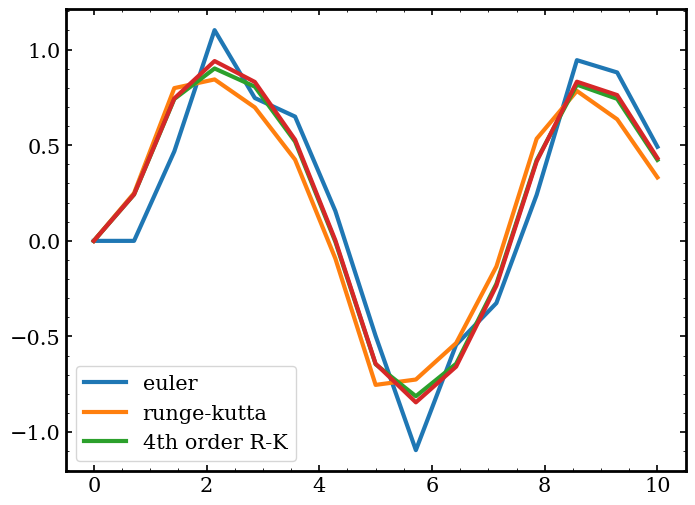

In [61]:
nsteps = 15
x, t = euler(dfdt, (0,10), 0, nsteps)
x1, t1 = runge_kutta(dfdt, (0,10), 0, nsteps)
x2, t2 = runge4(dfdt, (0,10), 0, nsteps)
pl.figure(figsize=(8,6))
pl.plot(t,x, label="euler")
pl.plot(t1, x1, label="runge-kutta")
pl.plot(t2, x2, label="4th order R-K")

obj = solve_ivp(dfdt, (0,10), [0], t_eval=t)
pl.plot(obj['t'], obj['y'][0,:])
#pl.plot(t, np.sin(t))
pl.legend()
pl.show()

In [58]:
solve_ivp(dfdt, (0,10), [0])

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04 ...  9.654e+00  1.000e+01]
        y: [[ 0.000e+00  5.000e-09 ...  6.210e-01  4.327e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 182
     njev: 0
      nlu: 0

/tmp/ipykernel_126800/164551651.py:2: RuntimeWarning: invalid value encountered in divide
  pl.plot(t1, (x1-x)/x1)


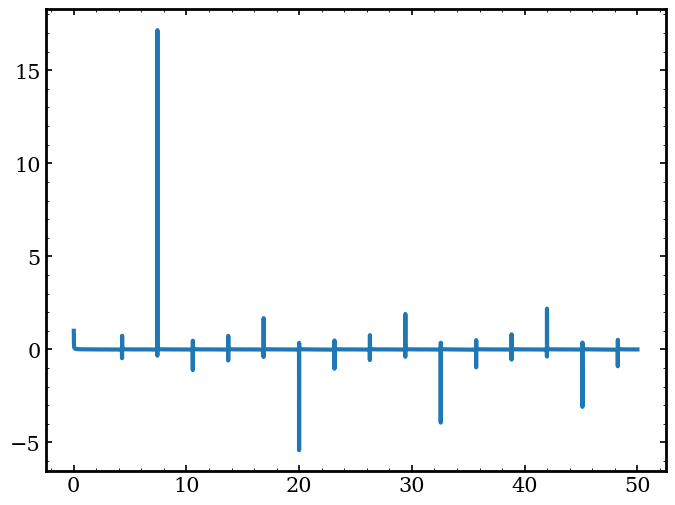

In [19]:
pl.figure(figsize=(8,6))
pl.plot(t1, (x1-x)/x1)
pl.show()

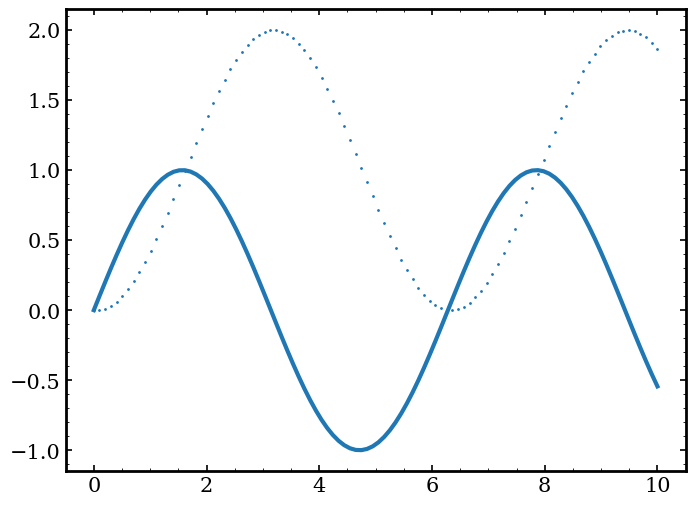

In [37]:
x, t = euler(alt, (0,10), 0, 1e2)
pl.figure(figsize=(8,6))
pl.scatter(t,x, s=1)
pl.plot(t, np.sin(t))
pl.show()